In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv', sep = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#ищем медианные значения для столбцов
median_parks_around3000 = df['parks_around3000'].median()
median_parks_nearest = df['parks_nearest'].median()
median_ponds_around3000 = df['ponds_around3000'].median()
median_ponds_nearest = df['ponds_nearest'].median()

In [6]:
#заполняем значения пустых ячеек (NA) медианными значениями или же (в balcony нулями )
df['ponds_nearest'] = df['ponds_nearest'].fillna(median_ponds_nearest)
df['ponds_around3000'] = df['ponds_nearest'].fillna(median_ponds_around3000)
df['parks_nearest'] = df['ponds_nearest'].fillna(median_parks_nearest)
df['parks_around3000'] = df['ponds_nearest'].fillna(median_parks_around3000)
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
#изменяем тип данных на дату для столбца first_day_exposition
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition'] = df['first_day_exposition'].dt.date

In [31]:
for i in range(4):
    median_value = df.loc[df['rooms'] == i, 'living_area'].median()
    df.loc[df['rooms'] == i, 'living_area'] = median_value
    
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  float64       
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          14504 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             23561 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,mouth_exposition,year_exposition,type_of_floor,living_to_total_ratio,kitchen_to_total_ratio,price_square_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,45.0,8,False,...,755.0,NaN,120370,Thursday,3,2019,другой,0.416667,0.231481,120370
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,17.6,1,False,...,502.0,81.0,82920,Tuesday,12,2018,первый,0.435644,0.272277,82920
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,30.5,4,False,...,574.0,558.0,92785,Thursday,8,2015,другой,0.544643,0.148214,92785
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.0,9,False,...,234.0,424.0,408176,Friday,7,2015,другой,0.283019,NaN,408176
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,30.5,13,False,...,48.0,121.0,100000,Tuesday,6,2018,другой,0.305000,0.410000,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,45.0,3,False,...,381.0,NaN,72490,Tuesday,3,2017,другой,0.336298,0.103356,72490
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,45.0,4,False,...,502.0,45.0,52542,Monday,1,2018,другой,0.762712,0.144068,52542
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,30.5,1,False,...,502.0,NaN,44091,Sunday,2,2018,первый,0.537919,NaN,44091
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,False,...,196.0,602.0,149511,Tuesday,3,2017,другой,0.397394,0.303583,149511


In [22]:
# цена квадратного метра
# считаем значение
df['price_square_meter'] = df['last_price'] / df['total_area']
# заполняем столбец и вписываем данные с типом данных int
df['price_square_meter']= df['price_square_meter'].astype('int')
df['price_square_meter']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_square_meter, Length: 23699, dtype: int32

In [23]:
#день недели, месяц и год публикации объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['mouth_exposition']=df['first_day_exposition'].dt.month
df['year_exposition']=df['first_day_exposition'].dt.year
# заполняем столбец
df[[ 'first_day_exposition', 'day_of_week_exposition', 'mouth_exposition', 'year_exposition']]


,first_day_exposition,day_of_week_exposition,mouth_exposition,year_exposition
0,2019-03-07,Thursday,3,2019
1,2018-12-04,Tuesday,12,2018
2,2015-08-20,Thursday,8,2015
3,2015-07-24,Friday,7,2015
4,2018-06-19,Tuesday,6,2018
...,...,...,...,...
23694,2017-03-21,Tuesday,3,2017
23695,2018-01-15,Monday,1,2018
23696,2018-02-11,Sunday,2,2018
23697,2017-03-28,Tuesday,3,2017


In [24]:
#этаж квартиры; варианты — первый, последний, другой
circs = [(df['floor']==1), (df['floor']==df['floors_total']),]

values = ['первый', 'последний']

df['type_of_floor']=np.select(circs, values, default='другой')

df[['floor', 'floors_total','type_of_floor']]

,floor,floors_total,type_of_floor
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой
...,...,...,...
23694,3,5.0,другой
23695,4,5.0,другой
23696,1,3.0,первый
23697,12,17.0,другой


In [25]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей
df['living_to_total_ratio'] = df['living_area']/df['total_area']
df['kitchen_to_total_ratio'] = df['kitchen_area']/df['total_area']
# заполняем столбец
df[['living_to_total_ratio','kitchen_to_total_ratio']]

,living_to_total_ratio,kitchen_to_total_ratio
0,0.416667,0.231481
1,0.435644,0.272277
2,0.544643,0.148214
3,0.283019,NaN
4,0.305000,0.410000
...,...,...
23694,0.336298,0.103356
23695,0.762712,0.144068
23696,0.537919,NaN
23697,0.397394,0.303583


In [26]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,day_of_week_exposition,mouth_exposition,year_exposition,type_of_floor,living_to_total_ratio,kitchen_to_total_ratio,price_square_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,45.0,8,False,...,755.0,NaN,120370,Thursday,3,2019,другой,0.416667,0.231481,120370
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,17.6,1,False,...,502.0,81.0,82920,Tuesday,12,2018,первый,0.435644,0.272277,82920
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,30.5,4,False,...,574.0,558.0,92785,Thursday,8,2015,другой,0.544643,0.148214,92785
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.0,9,False,...,234.0,424.0,408176,Friday,7,2015,другой,0.283019,NaN,408176
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,30.5,13,False,...,48.0,121.0,100000,Tuesday,6,2018,другой,0.305000,0.410000,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,45.0,3,False,...,381.0,NaN,72490,Tuesday,3,2017,другой,0.336298,0.103356,72490
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,45.0,4,False,...,502.0,45.0,52542,Monday,1,2018,другой,0.762712,0.144068,52542
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,30.5,1,False,...,502.0,NaN,44091,Sunday,2,2018,первый,0.537919,NaN,44091
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,False,...,196.0,602.0,149511,Tuesday,3,2017,другой,0.397394,0.303583,149511


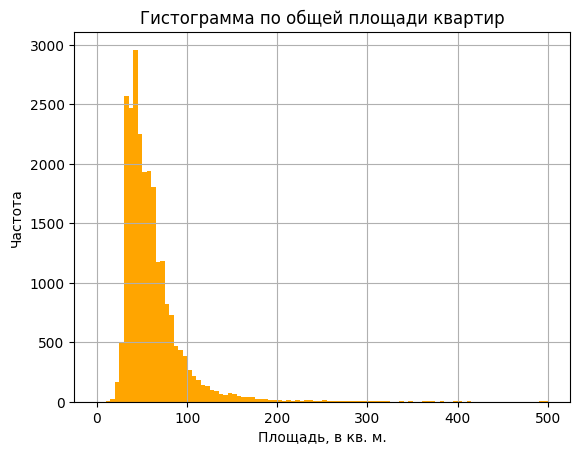

In [27]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра
plt.hist(df['total_area'], bins=100, range=(0, 500), color='orange')
plt.title('Гистограмма по общей площади квартир')
plt.xlabel('Площадь, в кв. м.')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

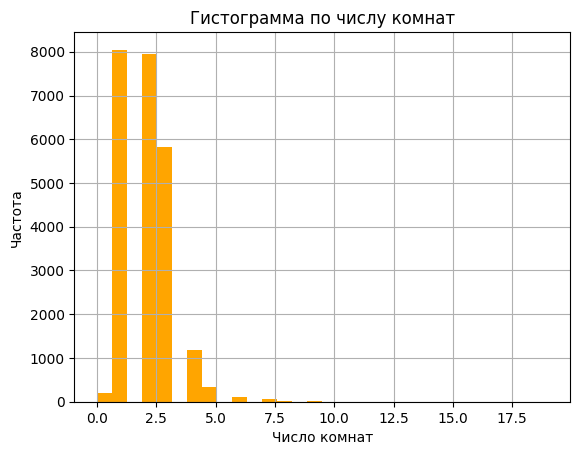

In [28]:
plt.hist(df['rooms'], bins=30, color='orange') 
plt.title('Гистограмма по числу комнат')
plt.xlabel('Число комнат')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

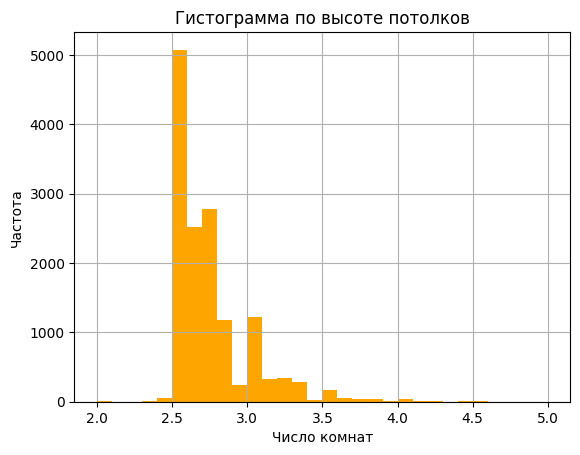

In [29]:
plt.hist(df['ceiling_height'], bins=30, range= (2,5), color='orange') 
plt.title('Гистограмма по высоте потолков')
plt.xlabel('Число комнат')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

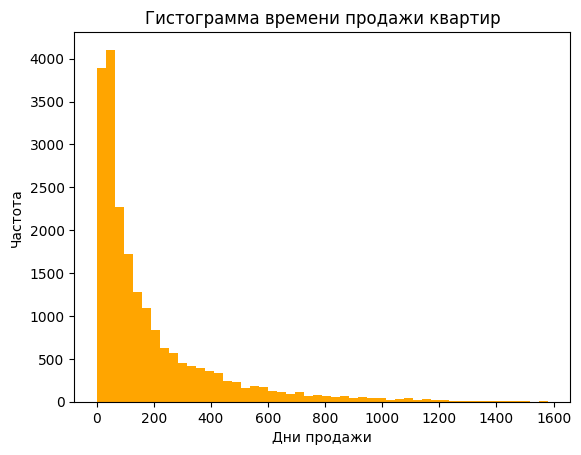

Среднее время продажи: 180.89 дней
Медианное время продажи: 95.0 дней


In [30]:
#Изучите время продажи квартиры. Постройте гистограмму. 
#Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа
plt.hist(df['days_exposition'], bins=50, color='orange')
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Дни продажи')
plt.ylabel('Частота')
plt.show()

# Находим среднее времени продажи квартир и медиану
mean_days = df['days_exposition'].mean()
median_days = df['days_exposition'].median()

print(f'Среднее время продажи: {mean_days:.2f} дней')
print(f'Медианное время продажи: {median_days} дней')

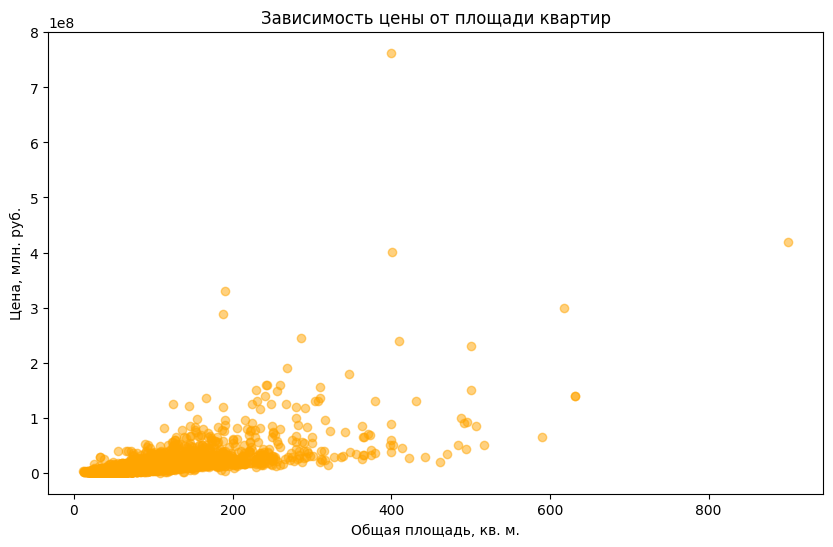

In [33]:
plt.figure(figsize=(10, 6))

plt.scatter(df['total_area'], df['last_price'], alpha=0.5, color='orange')

plt.title('Зависимость цены от площади квартир')
plt.xlabel('Общая площадь, кв. м.')
plt.ylabel('Цена, млн. руб.')

plt.show()